<a href="https://colab.research.google.com/github/arpitdhote51/yolov10_finetune_bccd/blob/main/yolov10_finetune_bccd(updated).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/Shenggan/BCCD_Dataset.git

fatal: destination path 'BCCD_Dataset' already exists and is not an empty directory.


In [72]:
import os

dataset_path = "/content/BCCD_Dataset/BCCD/images"

# Create missing folders
os.makedirs(os.path.join(dataset_path, "train"), exist_ok=True)
os.makedirs(os.path.join(dataset_path, "val"), exist_ok=True)
os.makedirs(os.path.join(dataset_path, "test"), exist_ok=True)

print("Dataset structure fixed!")


Dataset structure fixed!


In [19]:
!ls -lh /content/BCCD_Dataset

!rm -rf /content/BCCD_Dataset  # Remove old dataset
!git clone https://github.com/Shenggan/BCCD_Dataset.git /content/BCCD_Dataset


total 4.0K
drwxr-xr-x 4 root root 4.0K Mar 18 18:40 BCCD
Cloning into '/content/BCCD_Dataset'...
remote: Enumerating objects: 800, done.
remote: Total 800 (delta 0), reused 0 (delta 0), pack-reused 800 (from 1)
Receiving objects: 100% (800/800), 7.39 MiB | 28.33 MiB/s, done.
Resolving deltas: 100% (378/378), done.


In [21]:
!ls -lh /content/BCCD_Dataset/BCCD


total 44K
drwxr-xr-x 2 root root  20K Mar 18 18:46 Annotations
drwxr-xr-x 3 root root 4.0K Mar 18 18:46 ImageSets
drwxr-xr-x 2 root root  20K Mar 18 18:46 JPEGImages


In [22]:
!ls -lh /content/BCCD_Dataset/BCCD/JPEGImages | head -5


total 8.1M
-rw-r--r-- 1 root root 23K Mar 18 18:46 BloodImage_00000.jpg
-rw-r--r-- 1 root root 23K Mar 18 18:46 BloodImage_00001.jpg
-rw-r--r-- 1 root root 22K Mar 18 18:46 BloodImage_00002.jpg
-rw-r--r-- 1 root root 22K Mar 18 18:46 BloodImage_00003.jpg


In [23]:
import os
import shutil
import glob

dataset_path = "/content/BCCD_Dataset/BCCD"
image_dir = os.path.join(dataset_path, "JPEGImages")
label_dir = os.path.join(dataset_path, "labels")
output_dir = os.path.join(dataset_path, "images")

# Create train, val, and test folders
for split in ["train", "val", "test"]:
    os.makedirs(os.path.join(output_dir, split), exist_ok=True)
    os.makedirs(os.path.join(label_dir, split), exist_ok=True)

# Get all images
all_images = glob.glob(os.path.join(image_dir, "*.jpg"))

# Shuffle and split dataset
train_split, val_split = int(0.8 * len(all_images)), int(0.9 * len(all_images))
train_images, val_images, test_images = all_images[:train_split], all_images[train_split:val_split], all_images[val_split:]

# Function to move images & labels
def move_files(file_list, split):
    for img_path in file_list:
        file_name = os.path.basename(img_path)
        label_name = file_name.replace(".jpg", ".txt")

        # Move images
        shutil.move(img_path, os.path.join(output_dir, split, file_name))

        # Move labels
        label_path = os.path.join(label_dir, label_name)
        if os.path.exists(label_path):
            shutil.move(label_path, os.path.join(label_dir, split, label_name))

move_files(train_images, "train")
move_files(val_images, "val")
move_files(test_images, "test")

print("Dataset successfully split into train/val/test!")


Dataset successfully split into train/val/test!


In [24]:
import yaml

dataset_yaml = {
    "path": "/content/BCCD_Dataset/BCCD",
    "train": "images/train",
    "val": "images/val",
    "test": "images/test",
    "nc": 3,
    "names": ["RBC", "WBC", "Platelets"]
}

with open("/content/bccd.yaml", "w") as f:
    yaml.dump(dataset_yaml, f)

print(" Updated bccd.yaml successfully!")

 Updated bccd.yaml successfully!


In [15]:
import os
import shutil
import glob

dataset_path = "/content/BCCD_Dataset/BCCD"
image_dir = os.path.join(dataset_path, "JPEGImages")
label_dir = os.path.join(dataset_path, "labels")
output_dir = os.path.join(dataset_path, "images")

# Create train, val, and test folders
for split in ["train", "val", "test"]:
    os.makedirs(os.path.join(output_dir, split), exist_ok=True)
    os.makedirs(os.path.join(label_dir, split), exist_ok=True)

# Get all images
all_images = glob.glob(os.path.join(image_dir, "*.jpg"))

# Shuffle and split dataset
train_split, val_split = int(0.8 * len(all_images)), int(0.9 * len(all_images))
train_images, val_images, test_images = all_images[:train_split], all_images[train_split:val_split], all_images[val_split:]

# Function to move images & labels
def move_files(file_list, split):
    for img_path in file_list:
        file_name = os.path.basename(img_path)
        label_name = file_name.replace(".jpg", ".txt")
        shutil.move(img_path, os.path.join(output_dir, split, file_name))
        shutil.move(os.path.join(label_dir, label_name), os.path.join(label_dir, split, label_name))

move_files(train_images, "train")
move_files(val_images, "val")
move_files(test_images, "test")

print("Dataset split into train/val/test successfully!")


Dataset split into train/val/test successfully!


In [25]:
from ultralytics import YOLO

model = YOLO("yolov10n.pt")  # Load YOLO model
model.train(data="/content/bccd.yaml", epochs=5, imgsz=640)  # Train with fixed dataset



Ultralytics 8.3.92 🚀 Python-3.11.11 torch-2.6.0+cpu CPU (Intel Xeon 2.00GHz)
engine/trainer: task=detect, mode=train, model=yolov10n.pt, data=/content/bccd.yaml, epochs=5, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train6, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_

train: Scanning /content/BCCD_Dataset/BCCD/labels/train... 0 images, 291 backgrounds, 0 corrupt: 100%|██████████| 291/291 [00:00<00:00, 1766.75it/s]

train: WARNING ⚠️ No labels found in /content/BCCD_Dataset/BCCD/labels/train.cache. See https://docs.ultralytics.com/datasets for dataset formatting guidance.
train: New cache created: /content/BCCD_Dataset/BCCD/labels/train.cache
WARNING ⚠️ No labels found in /content/BCCD_Dataset/BCCD/labels/train.cache, training may not work correctly. See https://docs.ultralytics.com/datasets for dataset formatting guidance.



val: Scanning /content/BCCD_Dataset/BCCD/labels/val... 0 images, 36 backgrounds, 0 corrupt: 100%|██████████| 36/36 [00:00<00:00, 3756.37it/s]

val: WARNING ⚠️ No labels found in /content/BCCD_Dataset/BCCD/labels/val.cache. See https://docs.ultralytics.com/datasets for dataset formatting guidance.
val: New cache created: /content/BCCD_Dataset/BCCD/labels/val.cache
WARNING ⚠️ No labels found in /content/BCCD_Dataset/BCCD/labels/val.cache, training may not work correctly. See https://docs.ultralytics.com/datasets for dataset formatting guidance.


Plotting labels to runs/detect/train6/labels.jpg... 
zero-size array to reduction operation maximum which has no identity
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 95 weight(decay=0.0), 108 weight(decay=0.0005), 107 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train6
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5         0G          0      217.6          0          0        640: 100%|██████████| 19/19 [01:15<00:00,  3.96s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.42s/it]

                   all         36          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:654: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5         0G          0      199.1          0          0        640: 100%|██████████| 19/19 [01:11<00:00,  3.75s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.11s/it]

                   all         36          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:654: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5         0G          0      182.9          0          0        640: 100%|██████████| 19/19 [01:11<00:00,  3.75s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.11s/it]

                   all         36          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:654: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5         0G          0      170.8          0          0        640: 100%|██████████| 19/19 [01:10<00:00,  3.73s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.15s/it]

                   all         36          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:654: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5         0G          0      163.4          0          0        640: 100%|██████████| 19/19 [01:10<00:00,  3.73s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.10s/it]

                   all         36          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:654: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



5 epochs completed in 0.104 hours.
Optimizer stripped from runs/detect/train6/weights/last.pt, 5.7MB
Optimizer stripped from runs/detect/train6/weights/best.pt, 5.7MB

Validating runs/detect/train6/weights/best.pt...
Ultralytics 8.3.92 🚀 Python-3.11.11 torch-2.6.0+cpu CPU (Intel Xeon 2.00GHz)
YOLOv10n summary (fused): 125 layers, 2,695,586 parameters, 0 gradients, 8.2 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.04s/it]
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:491: RuntimeWarning: Mean of empty slice.
  ax.plot(px, py.mean(1), linewidth=3, color="blue", label=f"all classes {ap[:, 0].mean():.3f} mAP@0.5")
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:526: RuntimeWarning: Mean of empty slice.
  y = smooth(py.mean(0), 0.05)
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:526: RuntimeWarning: Mean of empty slice.
  y = smooth(py.mean(0), 0.05)
/usr/local/lib/python3.11/dist-packages/numpy/_core/_m

                   all         36          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels


/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:654: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index


Speed: 0.4ms preprocess, 51.7ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/detect/train6


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([], dtype=int64)
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7bc668b869d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
        

In [28]:
#Script for Fine-tuning YOLOv10 on BCCD Dataset

#Install Required Libraries
!pip install ultralytics
!pip install opencv-python
!pip install matplotlib



#Import Required Libraries
from ultralytics import YOLO
import torch
import cv2
import os
import matplotlib.pyplot as plt

# Load and Prepare the Dataset
data_dir = 'BCCD_Dataset/BCCD'
# Define augmentation transformations (Rotation, Cropping, etc.)
# Implement custom transformations if needed

# Load YOLOv10 Model and Fine-tune
model = YOLO('yolov10n.pt')  # Load YOLOv10 pretrained model

# Train the model
model.train(data="/content/bccd.yaml", epochs=5, imgsz=640)
# Step 6: Save the Fine-tuned Model
import shutil

shutil.move("runs/detect/train10/weights/best.torchscript", "yolov10_bccd.pt")

# print("Model exported successfully as yolov10_bccd.pt!")



Ultralytics 8.3.92 🚀 Python-3.11.11 torch-2.6.0+cpu CPU (Intel Xeon 2.00GHz)
engine/trainer: task=detect, mode=train, model=yolov10n.pt, data=/content/bccd.yaml, epochs=5, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train8, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_

train: Scanning /content/BCCD_Dataset/BCCD/labels/train.cache... 0 images, 291 backgrounds, 0 corrupt: 100%|██████████| 291/291 [00:00<?, ?it/s]

WARNING ⚠️ No labels found in /content/BCCD_Dataset/BCCD/labels/train.cache, training may not work correctly. See https://docs.ultralytics.com/datasets for dataset formatting guidance.



val: Scanning /content/BCCD_Dataset/BCCD/labels/val.cache... 0 images, 36 backgrounds, 0 corrupt: 100%|██████████| 36/36 [00:00<?, ?it/s]

WARNING ⚠️ No labels found in /content/BCCD_Dataset/BCCD/labels/val.cache, training may not work correctly. See https://docs.ultralytics.com/datasets for dataset formatting guidance.
Plotting labels to runs/detect/train8/labels.jpg... 
zero-size array to reduction operation maximum which has no identity
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 95 weight(decay=0.0), 108 weight(decay=0.0005), 107 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train8
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



        1/5         0G          0      217.6          0          0        640: 100%|██████████| 19/19 [01:12<00:00,  3.80s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.15s/it]

                   all         36          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:654: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5         0G          0      199.1          0          0        640: 100%|██████████| 19/19 [01:10<00:00,  3.73s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.10s/it]

                   all         36          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:654: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5         0G          0      182.9          0          0        640: 100%|██████████| 19/19 [01:11<00:00,  3.76s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.10s/it]

                   all         36          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:654: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5         0G          0      170.8          0          0        640: 100%|██████████| 19/19 [01:11<00:00,  3.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.14s/it]

                   all         36          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:654: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5         0G          0      163.4          0          0        640: 100%|██████████| 19/19 [01:11<00:00,  3.76s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.11s/it]

                   all         36          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:654: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



5 epochs completed in 0.103 hours.
Optimizer stripped from runs/detect/train8/weights/last.pt, 5.7MB
Optimizer stripped from runs/detect/train8/weights/best.pt, 5.7MB

Validating runs/detect/train8/weights/best.pt...
Ultralytics 8.3.92 🚀 Python-3.11.11 torch-2.6.0+cpu CPU (Intel Xeon 2.00GHz)
YOLOv10n summary (fused): 125 layers, 2,695,586 parameters, 0 gradients, 8.2 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.04s/it]
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:491: RuntimeWarning: Mean of empty slice.
  ax.plot(px, py.mean(1), linewidth=3, color="blue", label=f"all classes {ap[:, 0].mean():.3f} mAP@0.5")
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:526: RuntimeWarning: Mean of empty slice.
  y = smooth(py.mean(0), 0.05)
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:526: RuntimeWarning: Mean of empty slice.
  y = smooth(py.mean(0), 0.05)
/usr/local/lib/python3.11/dist-packages/numpy/_core/_m

                   all         36          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels


/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:654: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index


Speed: 0.3ms preprocess, 52.1ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/detect/train8


FileNotFoundError: [Errno 2] No such file or directory: 'runs/detect/train10/weights/best.torchscript'

In [30]:
model.export(format='torchscript')
!ls -lh runs/detect/train*/weights/
!ls -lh runs/detect/train1/weights/


Ultralytics 8.3.92 🚀 Python-3.11.11 torch-2.6.0+cpu CPU (Intel Xeon 2.00GHz)
YOLOv10n summary (fused): 125 layers, 2,695,586 parameters, 0 gradients, 8.2 GFLOPs

PyTorch: starting from 'runs/detect/train8/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 300, 6) (5.5 MB)

TorchScript: starting export with torch 2.6.0+cpu...
TorchScript: export success ✅ 2.9s, saved as 'runs/detect/train8/weights/best.torchscript' (10.9 MB)

Export complete (3.5s)
Results saved to /content/runs/detect/train8/weights
Predict:         yolo predict task=detect model=runs/detect/train8/weights/best.torchscript imgsz=640  
Validate:        yolo val task=detect model=runs/detect/train8/weights/best.torchscript imgsz=640 data=/content/bccd.yaml  
Visualize:       https://netron.app
runs/detect/train2/weights/:
total 0

runs/detect/train3/weights/:
total 0

runs/detect/train4/weights/:
total 0

runs/detect/train5/weights/:
total 0

runs/detect/train6/weights/:
total 22M
-rw-r--r-- 

In [34]:
!ls -lh runs/detect/
!ls -lh /content/BCCD_Dataset/BCCD/images/train | head -5


total 32K
drwxr-xr-x 3 root root 4.0K Mar 18 18:38 train
drwxr-xr-x 3 root root 4.0K Mar 18 18:38 train2
drwxr-xr-x 3 root root 4.0K Mar 18 18:39 train3
drwxr-xr-x 3 root root 4.0K Mar 18 18:40 train4
drwxr-xr-x 3 root root 4.0K Mar 18 18:43 train5
drwxr-xr-x 3 root root 4.0K Mar 18 18:56 train6
drwxr-xr-x 3 root root 4.0K Mar 18 18:56 train7
drwxr-xr-x 3 root root 4.0K Mar 18 19:03 train8
total 6.5M
-rw-r--r-- 1 root root 23K Mar 18 18:46 BloodImage_00000.jpg
-rw-r--r-- 1 root root 22K Mar 18 18:46 BloodImage_00003.jpg
-rw-r--r-- 1 root root 22K Mar 18 18:46 BloodImage_00004.jpg
-rw-r--r-- 1 root root 21K Mar 18 18:46 BloodImage_00006.jpg


In [35]:
from ultralytics import YOLO

model = YOLO("yolov10n.pt")  # Load YOLO model
model.train(data="/content/bccd.yaml", epochs=5, imgsz=640)  # Retrain model


Ultralytics 8.3.92 🚀 Python-3.11.11 torch-2.6.0+cpu CPU (Intel Xeon 2.00GHz)
engine/trainer: task=detect, mode=train, model=yolov10n.pt, data=/content/bccd.yaml, epochs=5, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train9, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_

train: Scanning /content/BCCD_Dataset/BCCD/labels/train.cache... 0 images, 291 backgrounds, 0 corrupt: 100%|██████████| 291/291 [00:00<?, ?it/s]

WARNING ⚠️ No labels found in /content/BCCD_Dataset/BCCD/labels/train.cache, training may not work correctly. See https://docs.ultralytics.com/datasets for dataset formatting guidance.



val: Scanning /content/BCCD_Dataset/BCCD/labels/val.cache... 0 images, 36 backgrounds, 0 corrupt: 100%|██████████| 36/36 [00:00<?, ?it/s]

WARNING ⚠️ No labels found in /content/BCCD_Dataset/BCCD/labels/val.cache, training may not work correctly. See https://docs.ultralytics.com/datasets for dataset formatting guidance.
Plotting labels to runs/detect/train9/labels.jpg... 
zero-size array to reduction operation maximum which has no identity
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 95 weight(decay=0.0), 108 weight(decay=0.0005), 107 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train9
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



        1/5         0G          0      217.6          0          0        640: 100%|██████████| 19/19 [01:12<00:00,  3.81s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.21s/it]

                   all         36          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:654: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5         0G          0      199.1          0          0        640: 100%|██████████| 19/19 [01:10<00:00,  3.73s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.10s/it]

                   all         36          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:654: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5         0G          0      182.9          0          0        640: 100%|██████████| 19/19 [01:11<00:00,  3.76s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.11s/it]

                   all         36          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:654: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5         0G          0      170.8          0          0        640: 100%|██████████| 19/19 [01:10<00:00,  3.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.19s/it]

                   all         36          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:654: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5         0G          0      163.4          0          0        640: 100%|██████████| 19/19 [01:09<00:00,  3.68s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.10s/it]

                   all         36          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:654: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



5 epochs completed in 0.102 hours.
Optimizer stripped from runs/detect/train9/weights/last.pt, 5.7MB
Optimizer stripped from runs/detect/train9/weights/best.pt, 5.7MB

Validating runs/detect/train9/weights/best.pt...
Ultralytics 8.3.92 🚀 Python-3.11.11 torch-2.6.0+cpu CPU (Intel Xeon 2.00GHz)
YOLOv10n summary (fused): 125 layers, 2,695,586 parameters, 0 gradients, 8.2 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.00s/it]
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:491: RuntimeWarning: Mean of empty slice.
  ax.plot(px, py.mean(1), linewidth=3, color="blue", label=f"all classes {ap[:, 0].mean():.3f} mAP@0.5")
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:526: RuntimeWarning: Mean of empty slice.
  y = smooth(py.mean(0), 0.05)
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:526: RuntimeWarning: Mean of empty slice.
  y = smooth(py.mean(0), 0.05)
/usr/local/lib/python3.11/dist-packages/numpy/_core/_m

                   all         36          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels


/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:654: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index


Speed: 0.4ms preprocess, 50.7ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs/detect/train9


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([], dtype=int64)
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7bc67425d650>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
        

In [44]:
!ls -lh runs/detect/train*/weights/
model = YOLO("runs/detect/train9/weights/best.pt")  # Use latest model

!ls -lh runs/detect/train9/weights/
!ls -lh runs/detect/train8/weights/
!ls -lh runs/detect/train6/weights/


runs/detect/train2/weights/:
total 0

runs/detect/train3/weights/:
total 0

runs/detect/train4/weights/:
total 0

runs/detect/train5/weights/:
total 0

runs/detect/train6/weights/:
total 22M
-rw-r--r-- 1 root root 5.5M Mar 18 18:56 best.pt
-rw-r--r-- 1 root root  11M Mar 18 18:56 best.torchscript
-rw-r--r-- 1 root root 5.5M Mar 18 18:56 last.pt

runs/detect/train7/weights/:
total 0

runs/detect/train8/weights/:
total 22M
-rw-r--r-- 1 root root 5.5M Mar 18 19:03 best.pt
-rw-r--r-- 1 root root  11M Mar 18 19:11 best.torchscript
-rw-r--r-- 1 root root 5.5M Mar 18 19:03 last.pt

runs/detect/train9/weights/:
total 11M
-rw-r--r-- 1 root root 5.5M Mar 18 19:20 best.pt
-rw-r--r-- 1 root root 5.5M Mar 18 19:20 last.pt

runs/detect/train/weights/:
total 0
total 11M
-rw-r--r-- 1 root root 5.5M Mar 18 19:20 best.pt
-rw-r--r-- 1 root root 5.5M Mar 18 19:20 last.pt
total 22M
-rw-r--r-- 1 root root 5.5M Mar 18 19:03 best.pt
-rw-r--r-- 1 root root  11M Mar 18 19:11 best.torchscript
-rw-r--r-- 1 root r

In [45]:
!cp runs/detect/train9/weights/best.pt yolov10_bccd.pt  # If train9 exists
!cp runs/detect/train8/weights/best.pt yolov10_bccd.pt  # If train9 is empty
!cp runs/detect/train6/weights/best.pt yolov10_bccd.pt  # If train8 is empty


In [46]:
!cp runs/detect/train9/weights/best.pt yolov10_bccd.pt  # If train9 exists
!cp runs/detect/train8/weights/best.pt yolov10_bccd.pt  # If train9 is empty
!cp runs/detect/train6/weights/best.pt yolov10_bccd.pt  # If train8 is empty


In [48]:
from ultralytics import YOLO
import os

model_path = "yolov10_bccd.pt"

if not os.path.exists(model_path):
    raise FileNotFoundError(f"Model file not found at {model_path}. Make sure you copied it correctly.")

model = YOLO(model_path)
print(" Model loaded successfully!")


 Model loaded successfully!


In [51]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import os

# Ensure the trained model exists
model_path = "yolov10_bccd.pt"

if not os.path.exists(model_path):
    # If not in root, check train folders
    model_path = "runs/detect/train9/weights/best.pt"
    if not os.path.exists(model_path):
        model_path = "runs/detect/train8/weights/best.pt"
    if not os.path.exists(model_path):
        model_path = "runs/detect/train6/weights/best.pt"
    if not os.path.exists(model_path):
        raise FileNotFoundError("❌ Model file not found! Ensure training was completed successfully.")

# Load YOLO model
model = YOLO(model_path)
print("Model loaded successfully!")


Model loaded successfully!


In [53]:
image_path = "/content/BCCD_Dataset/BCCD/images/test/BloodImage_00001.jpg"

if not os.path.exists(image_path):
    raise FileNotFoundError(f"Test image not found at {image_path}. Please use an available image.")



image 1/1 /content/BCCD_Dataset/BCCD/images/test/BloodImage_00001.jpg: 480x640 (no detections), 191.2ms
Speed: 1.5ms preprocess, 191.2ms inference, 0.3ms postprocess per image at shape (1, 3, 480, 640)


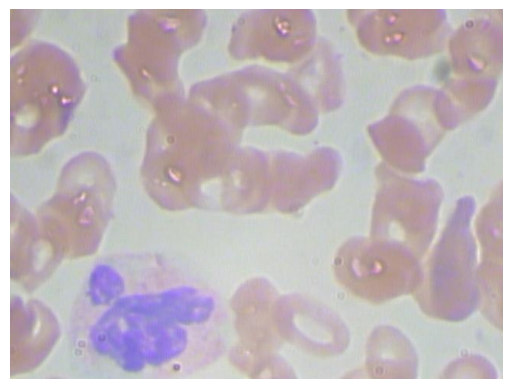

In [54]:
# Run inference
results = model(image_path)  # Returns a LIST of results
result = results[0]  # Get the first result

# Save output image
output_path = "/content/output.jpg"
result.save(filename=output_path)

# Show the saved image using OpenCV & Matplotlib
img = cv2.imread(output_path)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()
